In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_selection import SelectKBest, chi2

In [2]:
mnist = fetch_openml('mnist_784')

In [3]:
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0           0       0       0       0       0       0       0       0       0   
 1           0       0       0       0       0       0       0       0       0   
 2           0       0       0       0       0       0       0       0       0   
 3           0       0       0       0       0       0       0       0       0   
 4           0       0       0       0       0       0       0       0       0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995       0       0       0       0       0       0       0       0       0   
 69996       0       0       0       0       0       0       0       0       0   
 69997       0       0       0       0       0       0       0       0       0   
 69998       0       0       0       0       0       0       0       0       0   
 69999       0       0       0       0       0       0       0       0       0   
 
      

In [4]:
# Convert to DataFrame
df = pd.DataFrame(data=mnist.data, columns=mnist.feature_names)
df['class'] = mnist.target.astype(int)

In [5]:
df

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [6]:
# Visualize the first few entries of the dataset
df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [7]:
# Familiarize yourself with the features and class variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 785 entries, pixel1 to class
dtypes: int32(1), int64(784)
memory usage: 419.0 MB


In [8]:
df.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0,70000.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0,4.452429
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0,2.890195
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,2.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,4.000000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,7.000000
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0,9.000000


In [9]:

# Drop the class variable from the data frame and save it in a different variable
X = df.drop('class', axis=1)
y = df['class']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [11]:
X_train.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,56000.0,56000.0,56000.0,56000.0,56000.0,56000.0,56000.0,56000.0,56000.0,56000.0,...,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.0,56000.0,56000.0,56000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.203964,0.087464,0.034125,0.013429,0.010946,0.001036,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.059345,4.018066,2.320280,1.334271,1.382080,0.245095,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,254.000000,252.000000,187.000000,254.000000,58.000000,0.0,0.0,0.0,0.0


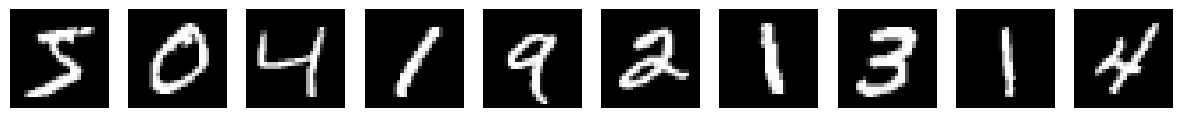

In [12]:
fig, axes = plt.subplots(1, 10, figsize=(15, 4))
for i in range(10):
    axes[i].imshow(X.iloc[i].values.reshape(28, 28), cmap='gray')
    axes[i].axis('off')
plt.show()

C:\Users\atuls\AppData\Local\Temp\ipykernel_8532\1505049178.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette=sns.color_palette("pastel"))


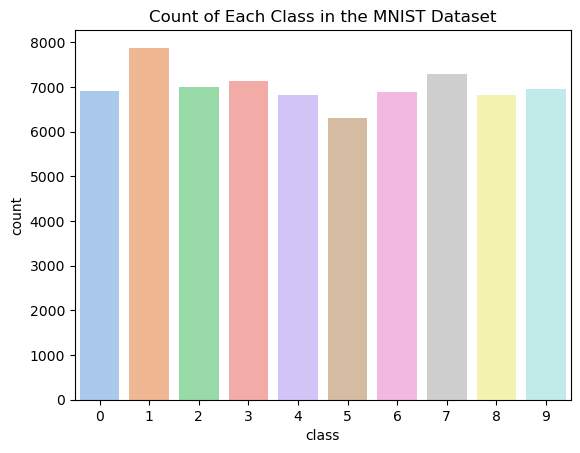

In [13]:
sns.countplot(x=y, palette=sns.color_palette("pastel"))
plt.title('Count of Each Class in the MNIST Dataset')
plt.show()

In [14]:

def display_samples(df: pd.DataFrame, digits=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], number_in_row=5, figsize=(10, 25), **imshow_kwargs):
    """
    Randomly picks digits from dataset and displays them.

    Keyword arguments:
    df -- consists of 'label' column and 784 columns from pixel0 to pixel783 
    digits -- digits to display, order matters
    number_in_row -- how many samples of each digit to display in a row
    figsize -- figure size, tuple (width, height) in inches
    imshow_kwargs -- keyword arguments of matplotlib.axes.Axes.imshow() except X 
    (cmap, norm, aspect, interpolation, etc) according to the definition
    https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.imshow.html#matplotlib.axes.Axes.imshow
    """
    # Randomly picks records
    picked_records = df[df['class'].isin(digits)].sample(frac=1).groupby('class').head(number_in_row)
    
    fig, axes = plt.subplots(len(digits), number_in_row, figsize=figsize)
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    
    for i in range(len(digits)):
        i_digit_records = picked_records[picked_records['class'] == digits[i]]
        
        # Converts rows of pixels into 28x28 matrices
        image_array = i_digit_records.iloc[:, 1:].values.reshape(number_in_row, 28, 28)
        
        for j in range(number_in_row):
            axes[i, j].imshow(
                image_array[j, :, :],
                cmap=imshow_kwargs.get('cmap', 'gray'),
                norm=imshow_kwargs.get('norm', None),
                aspect=imshow_kwargs.get('aspect', 'equal'),
                interpolation=imshow_kwargs.get('interpolation', 'nearest'),
                alpha=imshow_kwargs.get('alpha', None),
                vmin=imshow_kwargs.get('vmin', None),
                vmax=imshow_kwargs.get('vmax', None),
                origin=imshow_kwargs.get('origin', 'upper'),
                extent=imshow_kwargs.get('extent', None),
                filternorm=imshow_kwargs.get('filternorm', 1),
                filterrad=imshow_kwargs.get('filterrad', 4.0),
                resample=imshow_kwargs.get('resample', None),
                url=imshow_kwargs.get('url', None)
            )
            axes[i, j].axis('off')  # Hide axis

    plt.show()



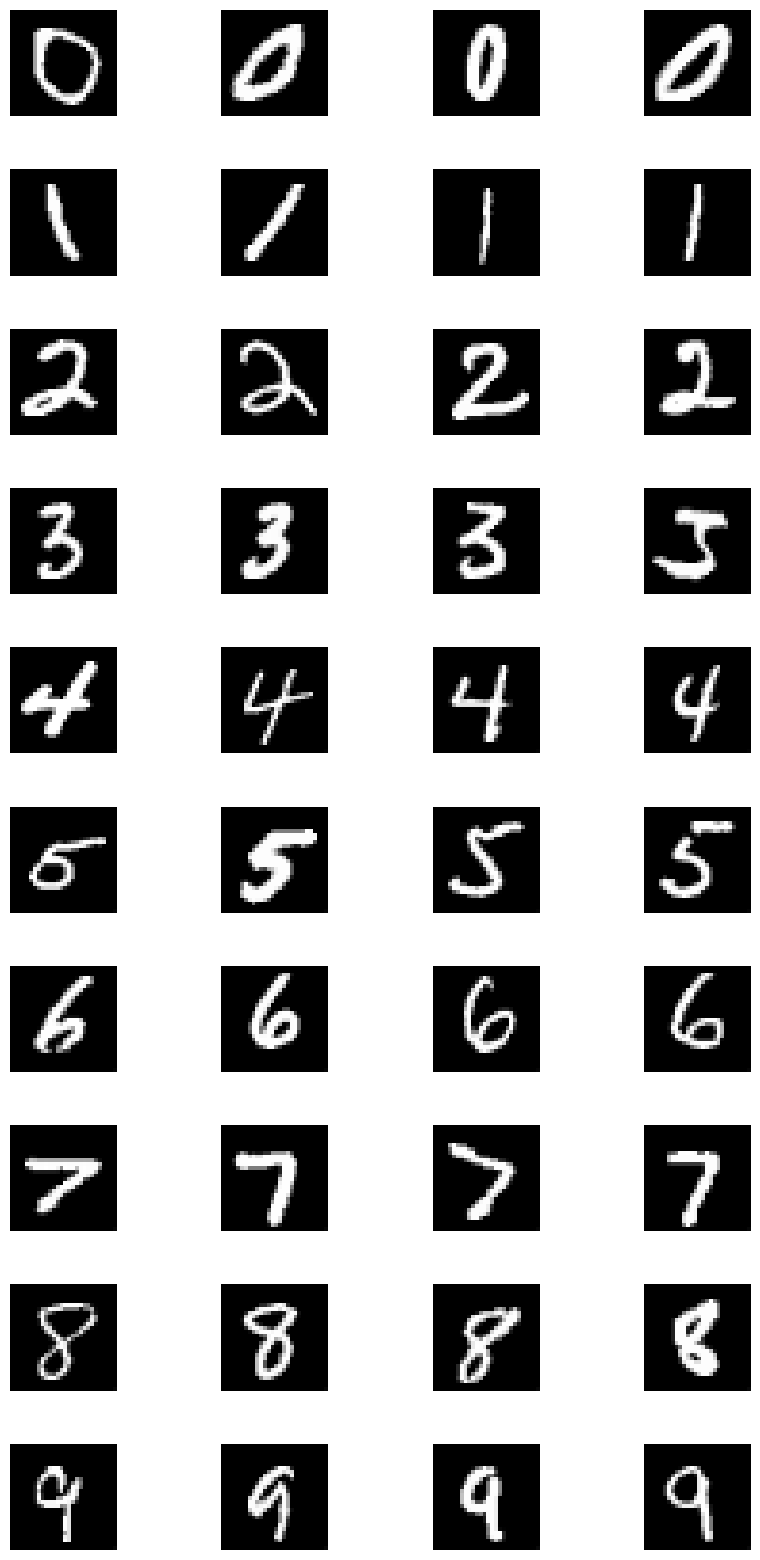

In [15]:
# In this call the function is set to display randomly picked samples:
# of these digits: 0,1,2,3,4,5,6,7,8,9
# 4 times in a row for each digit 
# in figure with 10 inch width and 12 inch height 
# as grayscale images"
display_samples(df, [0,1,2,3,4,5,6,7,8,9], 4, figsize=(10,20), cmap='gray', vmin=0, vmax=255)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [17]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [18]:
y_pred = knn.predict(X_test)

In [36]:
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f} %")

Accuracy: 97.19 %


In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1421
           1       0.95      1.00      0.97      1515
           2       0.98      0.96      0.97      1438
           3       0.98      0.97      0.97      1436
           4       0.98      0.96      0.97      1391
           5       0.97      0.98      0.97      1248
           6       0.97      0.99      0.98      1303
           7       0.97      0.97      0.97      1473
           8       0.98      0.94      0.96      1372
           9       0.95      0.97      0.96      1403

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



In [38]:
with open('classification_report.txt', 'a') as f:
    f.write(classification_report(y_test, y_pred))
f.close()

In [39]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [43]:
# from sklearn.model_selection import cross_val_score
# import numpy as np

# k_scores = []
# k_range = range(1, 5)
# for k in k_range:
#     knn = KNeighborsClassifier(n_neighbors=k)
#     scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
#     k_scores.append(scores.mean())
    
# best_k = k_range[np.argmax(k_scores)]
# best_score = max(k_scores)
# # Plot the cross-validation scores
# plt.plot(k_range, k_scores)
# plt.xlabel('Value of K for KNN')
# plt.ylabel('Cross-Validated Accuracy')
# plt.title('Finding the best k')
# plt.grid(True)

# plt.axvline(best_k, color='r', linestyle='--')
# plt.annotate(f'Best k = {best_k}\nAccuracy = {best_score:.4f}',
#              xy=(best_k, best_score), xytext=(best_k, best_score + 0.02),
#              arrowprops=dict(facecolor='black', shrink=0.05))

# plt.show()

# # Find the best k
# best_k = k_range[np.argmax(k_scores)]
# print(f'The best value for k is {best_k} with a cross-validated accuracy of {max(k_scores):.4f}')

In [30]:
k_scores

[0.9710178571428572,
 0.9649464285714284,
 0.9706964285714286,
 0.9693035714285715]

In [33]:
original_k_scores = pd.read_csv("range, accuracy.csv")
k_scores = original_k_scores[' accuracy']
k_range = original_k_scores['k']
k_scores

0     0.971018
1     0.964946
2     0.970696
3     0.968304
4     0.966946
        ...   
91    0.937357
92    0.937393
93    0.937161
94    0.936929
95    0.936964
Name:  accuracy, Length: 96, dtype: float64

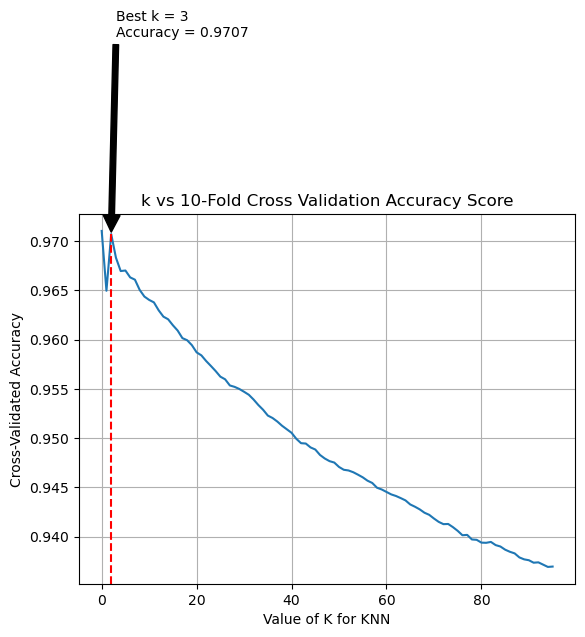

The best value for k is 3 with a cross-validated accuracy of 0.9707


In [62]:

best_k = k_range[np.argmax(k_scores[1:])]
best_score = max(k_scores[1:])
# Plot the cross-validation scores
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('k vs 10-Fold Cross Validation Accuracy Score')
plt.grid(True)
# plt.xticks([0, 3, 20, 40, 60, 80, 100])

plt.axvline(best_k+1, color='r', linestyle='--')
plt.annotate(f'Best k = {best_k+2}\nAccuracy = {best_score:.4f}',
             xy=(best_k+1, best_score), xytext=(best_k+2, best_score + 0.02),
             arrowprops=dict(facecolor='black', shrink=0.01))
plt.savefig('k vs accuracy.pdf', dpi=300)
plt.show()

# Find the best k
best_k = k_range[np.argmax(k_scores)]
print(f'The best value for k is {best_k+3} with a cross-validated accuracy of {max(k_scores[1:]):.4f}')


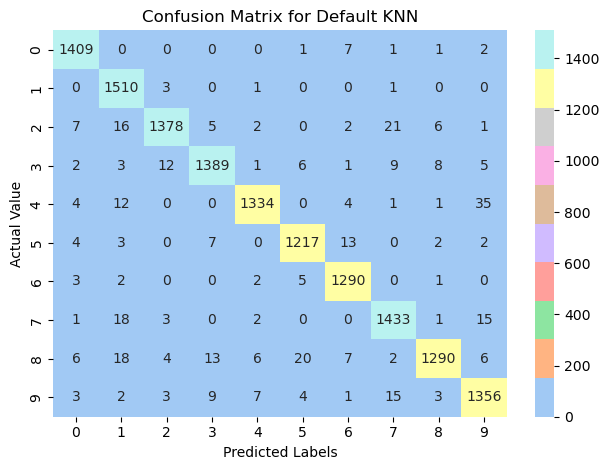

In [51]:
plt.title('Confusion Matrix for Default KNN')
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f', cmap=sns.color_palette('pastel'))
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Value')
plt.tight_layout()
plt.savefig('CM_default.pdf')


In [110]:
correlations = []
for i in range(X.shape[1]):
    correlation = np.corrcoef(X.values[:,i], y)[0,1]
    correlations.append(correlation)

c:\Users\atuls\miniconda3\envs\DM\lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\atuls\miniconda3\envs\DM\lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [107]:
import math
math.isnan(correlations[0])

True

In [117]:
# remove nan value from correlations
processed_corr = [0 if math.isnan(x) else x for x in correlations]     
processed_corr

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.0017409233931247362,
 -0.0005359419722646074,
 -0.0032072025672470524,
 -0.003207202567247129,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.0020238612111019754,
 -0.00017323134898727794,
 0.0010583643741550938,
 0.004391960236928492,
 0.004413462441653076,
 0.007230982841604962,
 0.010606003422366613,
 0.012992599793560697,
 0.014585830097958467,
 0.014803856611707912,
 0.012347784623998829,
 0.009675612263538249,
 0.007367084327031048,
 0.010832802628454024,
 0.011948428048001725,
 0.009924080504818253,
 0.008628508169485814,
 0.005451279547210254,
 0.004126939292278761,
 0.0021716784841341046,
 0,
 0,
 0,
 0,
 0,
 0,
 0.002023861211101978,
 -0.004485451026774708,
 0.003832065921569081,
 -0.0023002953050338284,
 0.0007593030561562727,
 0.004864890322632991,
 0.008350419344446965,
 0.01129730803652361,
 0.01631606518875978,
 0.02185570187804003,
 0.028971831707847947,
 0.03750910010778815,
 0.044711617624014544,
 

In [124]:
c = 0
for val in processed_corr:
    if abs(val)>0:
        c+=1
c

719

In [122]:
65+719

784

In [131]:
feature_weights = np.abs(processed_corr)
feature_weights = sorted(feature_weights, reverse=True)
feature_weights[:10]

[0.4282912765903319,
 0.421422389114755,
 0.42017655743499194,
 0.4128070464831084,
 0.3753183088144953,
 0.36091314884900977,
 0.3531326824722247,
 0.35238927909969914,
 0.3391171429963162,
 0.3216914798477211]

Weighted KNN

In [132]:
knn = KNeighborsClassifier( 
    metric_params={'w': feature_weights}
)

In [136]:
with open('weighted_knn.txt','w') as f:
    f.write(str(knn.get_params))

In [139]:
knn.fit(X_train, y_train)

KNeighborsClassifier(metric_params={'w': [0.4282912765903319, 0.421422389114755,
                                          0.42017655743499194,
                                          0.4128070464831084,
                                          0.3753183088144953,
                                          0.36091314884900977,
                                          0.3531326824722247,
                                          0.35238927909969914,
                                          0.3391171429963162,
                                          0.3216914798477211,
                                          0.3194923058888866,
                                          0.3177131814421001,
                                          0.3137697822050329,
                                          0.31242955299676045,
                                          0.3107400977812889,
                                          0.30973501852993846,
                                          0.3097199088733904,
                                          0.30399960279195815,
                                          0.30143967969543745,
                                          0.3009057481662837,
                                          0.29554470908407293,
                                          0.29495016216530967,
                                          0.2889696100339311,
                                          0.28862601013664924,
                                          0.28759581396129735,
                                          0.28677204851102894,
                                          0.28675279711138907,
                                          0.2845095444628478,
                                          0.28172087882532204,
                                          0.27846342147926106, ...]})

In [143]:
y_pred = knn.predict(X_test)

In [145]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1447
           1       1.00      0.94      0.97      1599
           2       0.91      0.95      0.93      1376
           3       0.93      0.94      0.93      1418
           4       0.96      0.98      0.97      1373
           5       0.97      0.96      0.96      1260
           6       0.98      0.97      0.97      1321
           7       0.96      0.92      0.94      1532
           8       0.86      0.97      0.91      1217
           9       0.96      0.93      0.94      1457

    accuracy                           0.95     14000
   macro avg       0.95      0.95      0.95     14000
weighted avg       0.95      0.95      0.95     14000



In [148]:

with open('parameters and classification_report.txt', 'a') as f:
    f.write('\n')
    f.write('Weighted KNN Model with only metric params passed.\n')
    f.write(classification_report(y_test, y_pred))
f.close()

In [149]:
knn = KNeighborsClassifier(
    n_neighbors=3, 
    metric_params={'w': feature_weights}
)

In [161]:
def evaluate(model):
    # fit the model
    model.fit(X_train, y_train)
    model_name = input('Enter Model Name: ')
    # perform inference
    y_pred = model.predict(X_test)
    print("Model Prediction Calculated")
    # Generate Classification Report
    with open('parameters and classification_report.txt', 'a') as f:
        f.write('\n')
        f.write(f'Classfication Report for {model_name}\n')
        f.write(classification_report(y_test, y_pred))
        f.close()
    print(classification_report(y_test, y_pred))
    print("Classification Generated")

    # Generate Confusion Matrix
    plt.title(f'Confusion Matrix for {model_name}')
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f', cmap=sns.color_palette('pastel'))
    plt.xlabel('Predicted Labels')
    plt.ylabel('Actual Value')
    plt.tight_layout()
    plt.savefig(f'CM_{model_name}.pdf')

KNeighborsClassifier(metric_params={'w': [0.4282912765903319, 0.421422389114755,
                                          0.42017655743499194,
                                          0.4128070464831084,
                                          0.3753183088144953,
                                          0.36091314884900977,
                                          0.3531326824722247,
                                          0.35238927909969914,
                                          0.3391171429963162,
                                          0.3216914798477211,
                                          0.3194923058888866,
                                          0.3177131814421001,
                                          0.3137697822050329,
                                          0.31242955299676045,
                                          0.3107400977812889,
                                          0.30973501852993846,
                                          0.3097199088733904,
                                          0.30399960279195815,
                                          0.30143967969543745,
                                          0.3009057481662837,
                                          0.29554470908407293,
                                          0.29495016216530967,
                                          0.2889696100339311,
                                          0.28862601013664924,
                                          0.28759581396129735,
                                          0.28677204851102894,
                                          0.28675279711138907,
                                          0.2845095444628478,
                                          0.28172087882532204,
                                          0.27846342147926106, ...]},
                     n_neighbors=3)

In [150]:
knn.fit(X_train, y_train)

KNeighborsClassifier(metric_params={'w': [0.4282912765903319, 0.421422389114755,
                                          0.42017655743499194,
                                          0.4128070464831084,
                                          0.3753183088144953,
                                          0.36091314884900977,
                                          0.3531326824722247,
                                          0.35238927909969914,
                                          0.3391171429963162,
                                          0.3216914798477211,
                                          0.3194923058888866,
                                          0.3177131814421001,
                                          0.3137697822050329,
                                          0.31242955299676045,
                                          0.3107400977812889,
                                          0.30973501852993846,
                                          0.3097199088733904,
                                          0.30399960279195815,
                                          0.30143967969543745,
                                          0.3009057481662837,
                                          0.29554470908407293,
                                          0.29495016216530967,
                                          0.2889696100339311,
                                          0.28862601013664924,
                                          0.28759581396129735,
                                          0.28677204851102894,
                                          0.28675279711138907,
                                          0.2845095444628478,
                                          0.28172087882532204,
                                          0.27846342147926106, ...]},
                     n_neighbors=3)

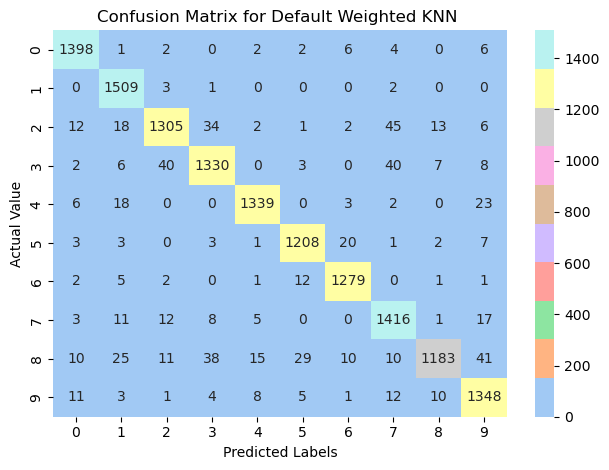

In [156]:
evaluate(knn)

In [159]:
knn = KNeighborsClassifier(
    n_neighbors=3,
    metric_params={'w': feature_weights}
)

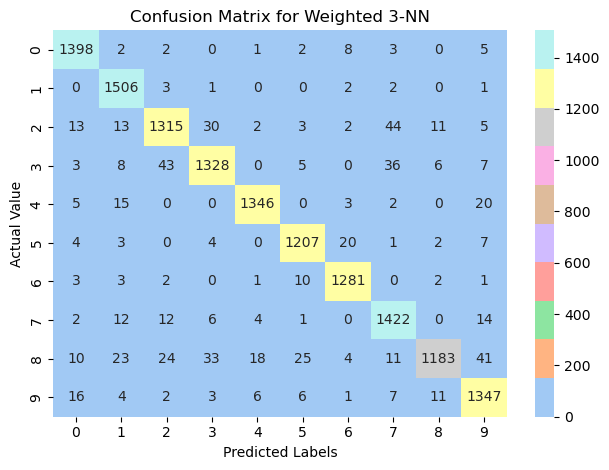

In [160]:
evaluate(knn)

In [162]:
weights = feature_weights.copy()

In [165]:
weights[:10]

[0.4282912765903319,
 0.421422389114755,
 0.42017655743499194,
 0.4128070464831084,
 0.3753183088144953,
 0.36091314884900977,
 0.3531326824722247,
 0.35238927909969914,
 0.3391171429963162,
 0.3216914798477211]

In [174]:
sorted(weights)[-740:]

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 4.64726881657585e-05,
 0.00017323134898727794,
 0.0003466719332633326,
 0.00034850600518481894,
 0.00038060801107271983,
 0.0004097850689213424,
 0.0005359419722646074,
 0.0005989782705894799,
 0.0006055666815231908,
 0.0006859166161141225,
 0.0007160952665147124,
 0.0007593030561562727,
 0.0007902960065294825,
 0.0010583643741550938,
 0.0013229390834468848,
 0.0013339896546055126,
 0.0013999135049789476,
 0.0016534251837615013,
 0.0016754164623733214,
 0.001717546677024129,
 0.0017409233931247362,
 0.001804847483182764,
 0.0018994366226598002,
 0.0018994366226598002,
 0.0018994366226598193,
 0.0019144708482800382,
 0.0020238612111019754,
 0.002023861211101978,
 0.0021716784841341046,
 0.0023002953050338284,
 0.002331898172967141,
 0.002460170901660359,
 0.0025915732393868916,
 0.0026730135650821704,
 0.002722718004827861,
 0.0028338570977185455,
 0.00291996484

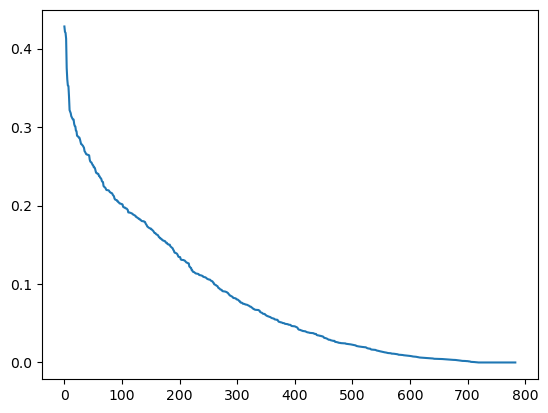

In [176]:
plt.plot(feature_weights)

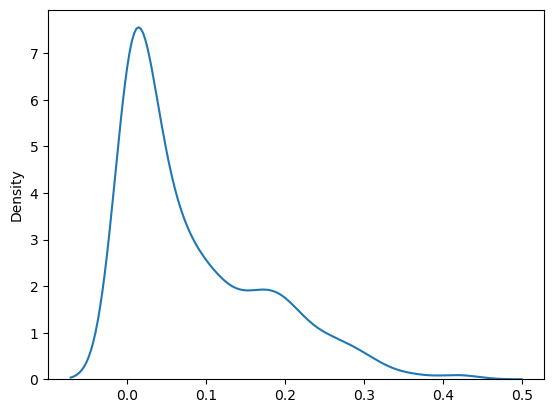

In [190]:
sns.kdeplot(np.abs(processed_corr))
plt.savefig('Density of Correlation.pdf')

In [188]:
feature_weights = [0 if x<0.2 else x for x in np.abs(processed_corr)]

In [191]:
knn = KNeighborsClassifier(
    n_neighbors=3,
    metric_params={'w': feature_weights}
)

Model Prediction Calculated
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1421
           1       0.92      0.99      0.96      1515
           2       0.89      0.89      0.89      1438
           3       0.87      0.89      0.88      1436
           4       0.87      0.84      0.85      1391
           5       0.89      0.85      0.87      1248
           6       0.92      0.96      0.94      1303
           7       0.87      0.88      0.87      1473
           8       0.92      0.80      0.85      1372
           9       0.81      0.81      0.81      1403

    accuracy                           0.89     14000
   macro avg       0.89      0.89      0.89     14000
weighted avg       0.89      0.89      0.89     14000

Classification Generated


OSError: [Errno 22] Invalid argument: 'CM_Weighted 3-NN with important features (Corr>0.2).pdf'

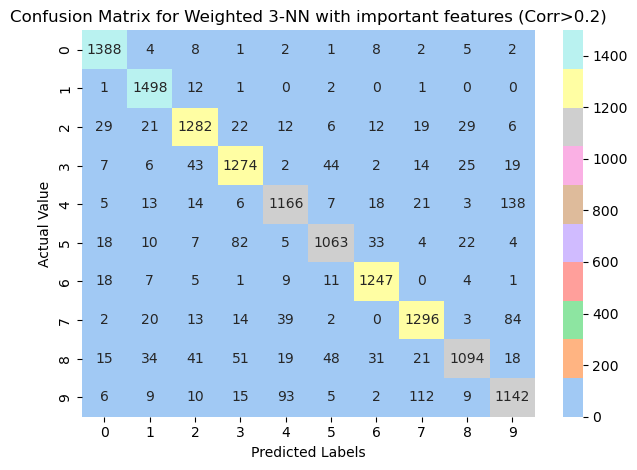

In [192]:
evaluate(knn)

In [197]:
knn = KNeighborsClassifier(metric='manhattan')

Model Prediction Calculated
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1421
           1       0.93      1.00      0.96      1515
           2       0.98      0.94      0.96      1438
           3       0.97      0.96      0.96      1436
           4       0.98      0.95      0.97      1391
           5       0.97      0.97      0.97      1248
           6       0.97      0.99      0.98      1303
           7       0.96      0.97      0.96      1473
           8       0.99      0.92      0.95      1372
           9       0.95      0.96      0.95      1403

    accuracy                           0.96     14000
   macro avg       0.97      0.96      0.96     14000
weighted avg       0.97      0.96      0.96     14000

Classification Generated


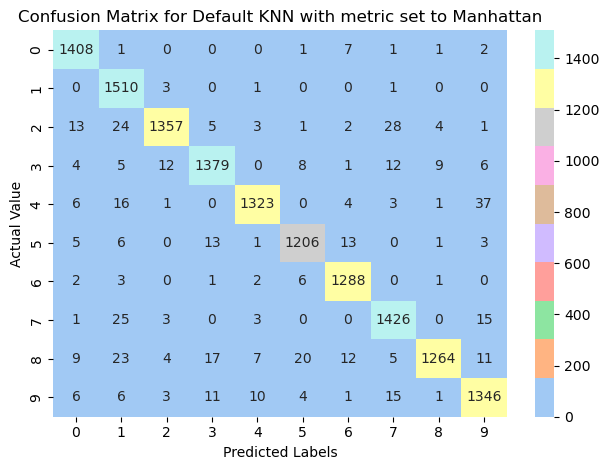

In [198]:
evaluate(knn)

In [199]:
knn.get_params

<bound method BaseEstimator.get_params of KNeighborsClassifier(metric='manhattan')>